In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import tensorflow as tf

In [3]:
train_dir = '/home/ben/Workspace/embc_2020_auto/data/muct/training/'
images = []
coords = []
for idx, filename in enumerate(os.listdir(train_dir)):
    
    if '.txt' in filename:
        continue
        
    basename = os.path.join(train_dir, filename)
    images.append(np.array(Image.open(basename)))
    coords.append(np.loadtxt(basename.replace('.jpg', '.txt')))
    
    if idx > 2:
        break

In [4]:
dat = tf.data.Dataset.from_tensor_slices((images, coords))

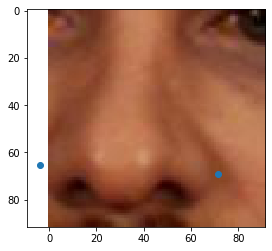

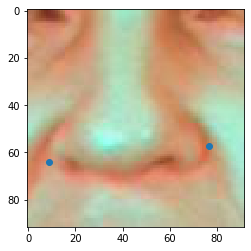

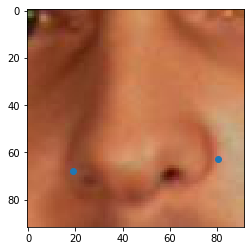

In [5]:
for a, b in dat:
    plt.figure()
    plt.imshow(a.numpy())
    _b = b.numpy()
    plt.scatter(_b[:,0], _b[:,1])

In [34]:
def scale_coords(pts, scale):
    mean_pts = tf.reduce_mean(pts, axis=0)
    resize_pts = pts - mean_pts
    resize_pts *= scale
    resize_pts += (scale * mean_pts)
    return resize_pts

In [6]:
img_resize = tf.image.resize(
    a,
    tf.constant((np.int(96*2.1), np.int(96*2.1))),
    preserve_aspect_ratio=True
)

In [8]:
resize_pts = scale_coords(b, 2.1)

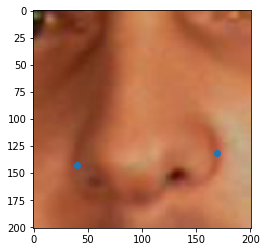

In [9]:
plt.imshow(img_resize.numpy().astype(np.uint8));
pts_np = resize_pts.numpy()
plt.scatter(pts_np[:,0], pts_np[:,1])

In [17]:
img_crop = tf.image.crop_to_bounding_box(
    img_resize,
    offset_height=8,
    offset_width=8,
    target_height=96*2,
    target_width=96*2,
)

In [19]:
pts_crop = tf.Variable(resize_pts)
pts_crop = pts_crop - 6

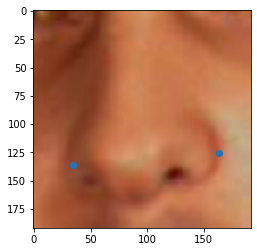

In [20]:
plt.imshow(img_crop.numpy().astype(np.uint8));
pts_np = pts_crop.numpy()
plt.scatter(pts_np[:,0], pts_np[:,1])

tf.Tensor([9 2], shape=(2,), dtype=int32)


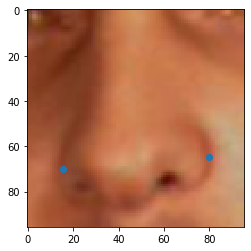

In [130]:
def jitter(x, y, width=96, height=96, jit=2.1):
       
   
    x_resize = tf.image.resize(x,
        tf.constant((int(width * jit), int(height * jit))),
        preserve_aspect_ratio=True,
    )
        
    y_resize = scale_coords(y, jit)
    
    corner = tf.random.uniform(
        shape=[2],
        minval=0,
        maxval=10,
        dtype=tf.int32
    )
    
    print(corner)
        
    x_crop = tf.image.crop_to_bounding_box(
        x_resize,
        offset_height=corner[1],
        offset_width=corner[0],
        target_width=width * int(jit),
        target_height=height * int(jit),        
    )
        
    x_restore = tf.image.resize(
        x_crop,
        tf.constant((width, height)),
        preserve_aspect_ratio=True)
    
    corner = tf.broadcast_to(corner, [2, 2])
    corner = tf.cast(corner, tf.float64) 
        
    y_restore = scale_coords(
        y_resize - corner, 0.5)
        
    return x_restore, y_restore

x_rest, y_rest = jitter(a, b)
plt.imshow(x_rest.numpy().astype(np.uint8));
pts_np = y_rest.numpy()
plt.scatter(pts_np[:,0], pts_np[:,1])

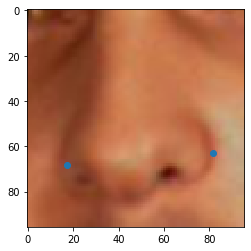

In [21]:
img_restore = tf.image.resize(img_crop, tf.constant((96, 96)), preserve_aspect_ratio=True)
restore_pts = scale_coords(pts_crop, 0.5)

plt.imshow(img_restore.numpy().astype(np.uint8));
pts_np = restore_pts.numpy()
plt.scatter(pts_np[:,0], pts_np[:,1])

In [121]:
y_rest

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[82.025     , 61.74166667],
       [17.625     , 67.10833333]])>

In [115]:
corner = tf.Variable([5, 8])

In [116]:
corner

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 8], dtype=int32)>

In [117]:
corner = tf.broadcast_to(corner, [2, 2])
corner = tf.cast(corner, tf.float64)

In [118]:
corner

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[5., 8.],
       [5., 8.]])>

In [120]:
b

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[80.5       , 62.61111111],
       [19.16666667, 67.72222222]])>

In [119]:
tf.subtract(b, corner)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[75.5       , 54.61111111],
       [14.16666667, 59.72222222]])>